# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# EDA

In [2]:
data = pd.read_csv('insurance.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
data.describe()
# This is a regression task and we notice that there are 3 columns hidden from the data bec. data.describe() prompt can't show
# categorical data

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
data.info()
# This is the proof that these 3 hidden columns are the same columns typed as objects
# 'sex', 'smoker', 'region'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Encoding Categorical Data

In [5]:
le = LabelEncoder()

In [6]:
# Encoding the categorical data
data['sex'] = le.fit_transform(data['sex'])
# female = 0, male = 1
data['smoker'] = le.fit_transform(data['smoker'])
# no = 0, yes = 1
data['region'] = le.fit_transform(data['region'])
# northeast = 0, northwest = 1, southeast = 2, southwest = 3

In [7]:
data.describe()
# We succeeded in showing it here

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


# Data Visualization

(array([417., 284., 339., 298.]),
 array([18. , 29.5, 41. , 52.5, 64. ]),
 <BarContainer object of 4 artists>)

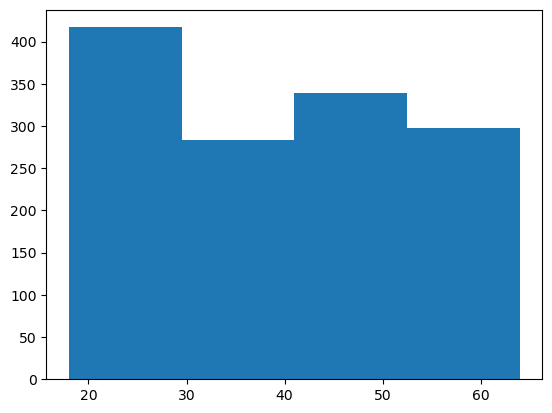

In [8]:
plt.hist(data['age'], bins = 4)
# Here I classified the bins to 4 bins to clarify every generation from 20s to 60s, we notice that the largest set of samples 
# are the people from 18 to 29.5 years, or we can name it as 20s people, while the second largest set are 40s people, we maybe 
# need to target these 2 classes more than the other classes.

(array([662., 676.]),
 array([0. , 0.5, 1. ]),
 <BarContainer object of 2 artists>)

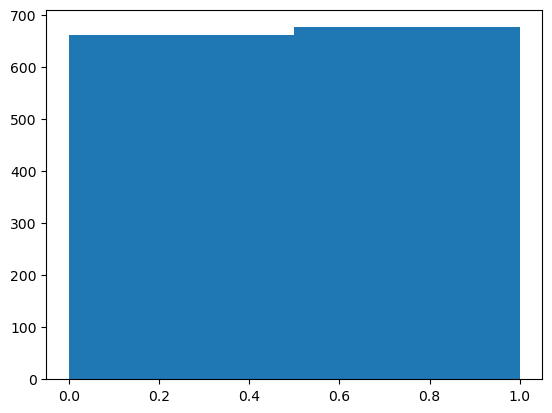

In [9]:
plt.hist(data['sex'], bins = 2)
# No difference can be concluded from this histogram

(array([ 57., 203., 359., 379., 222.,  89.,  25.,   4.]),
 array([15.96   , 20.60625, 25.2525 , 29.89875, 34.545  , 39.19125,
        43.8375 , 48.48375, 53.13   ]),
 <BarContainer object of 8 artists>)

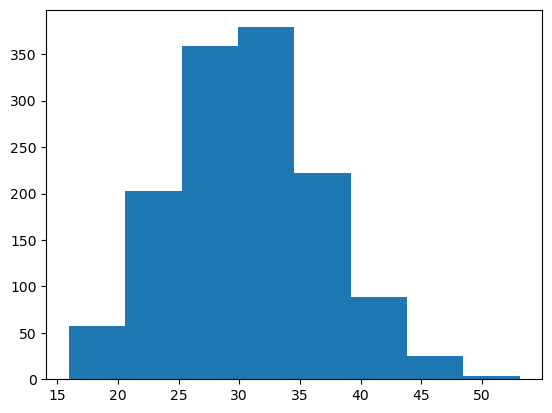

In [10]:
plt.hist(data['bmi'], bins = 8)
# By searching on what BMI is, we can see it's an indicator of how healthy sample's body is, the ranges are approx. between 15
# to 20 as thinness, between 20 to 25 as normal, between 25 to 30 as overweight and between 30 to 35 as obese, simply any sample
# less than 15 is extremely thin or maybe too young "but we don't have it here" & any sample more than 35 is extremely obese 
# "which we have a lot in here".
# Here we can see that the largest 3 sets are the sets of obese, overweight & extremely obese samples respectively, this makes 
# targeting a more obesed than normal person an obvious target for us.

(array([574., 324., 240., 157.,  25.,  18.]),
 array([0.        , 0.83333333, 1.66666667, 2.5       , 3.33333333,
        4.16666667, 5.        ]),
 <BarContainer object of 6 artists>)

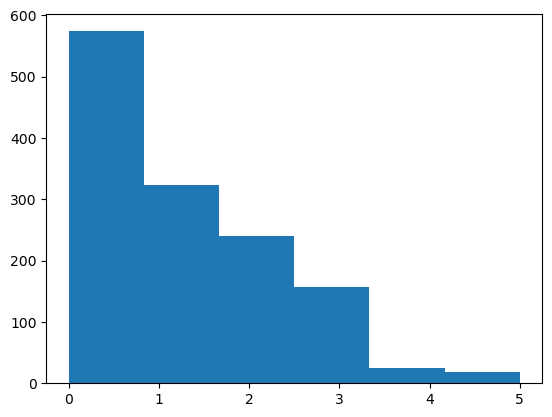

In [11]:
plt.hist(data['children'], bins = 6)
# An easy pattern here, the less children the sample has the more his opportunity to be included in this dataset, we clearly 
# need to target samples who don't have children at all more than any other class

(array([1064.,  274.]),
 array([0. , 0.5, 1. ]),
 <BarContainer object of 2 artists>)

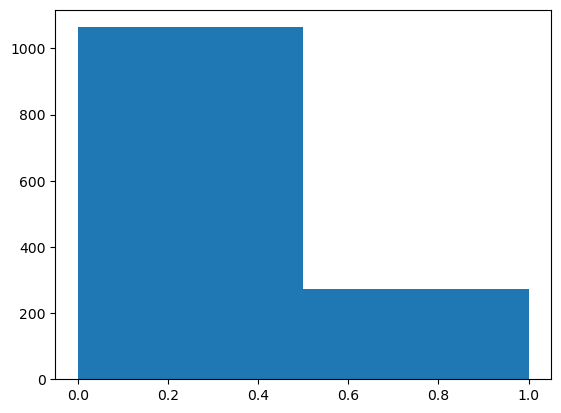

In [12]:
plt.hist(data['smoker'], bins = 2)
# Another easy pattern here, there's a strong relation between being a smoker and not being included in this dataset.

(array([324., 325., 364., 325.]),
 array([0.  , 0.75, 1.5 , 2.25, 3.  ]),
 <BarContainer object of 4 artists>)

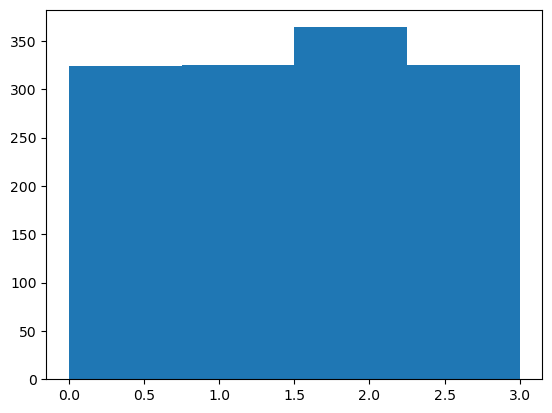

In [13]:
plt.hist(data['region'], bins = 4)
# As of sex histogram, we can't conclude anything from here.

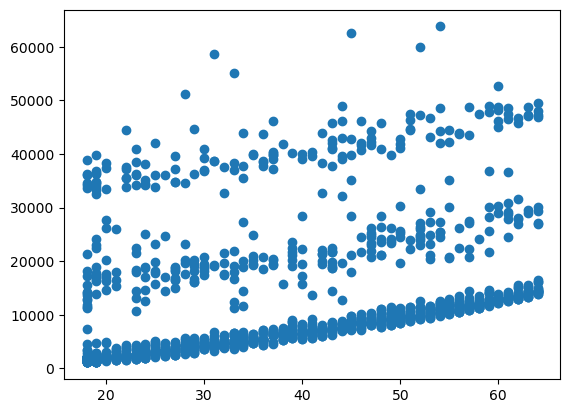

In [14]:
plt.scatter(data['age'], data['charges'])
# Here we can conclude that there are types of payments in this company, and it's hard to notice but with a little focus we can
# see that's the more the age of the sample the more money will be paid "in every type of payment".

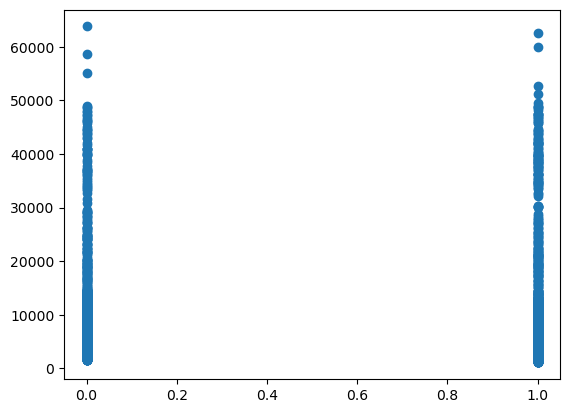

In [15]:
plt.scatter(data['sex'], data['charges'])
# As we discussed earlier, this column doesn't tell us anything.

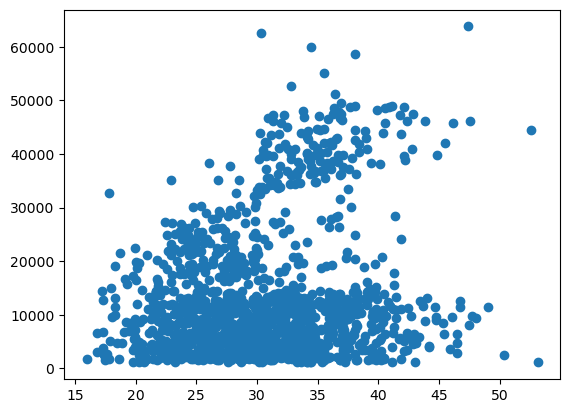

In [16]:
plt.scatter(data['bmi'], data['charges'])
# Remember our talk about the overweight people? Now I think it's clear for us that thin, normal, overweight & even obese people
# pay similar amount of money with respect to every condition "maybe it's between >0 & <30000", and with going towards the 
# ">30000" people we can find that the samples of overweight people are the people showed here to pay a lot of money.

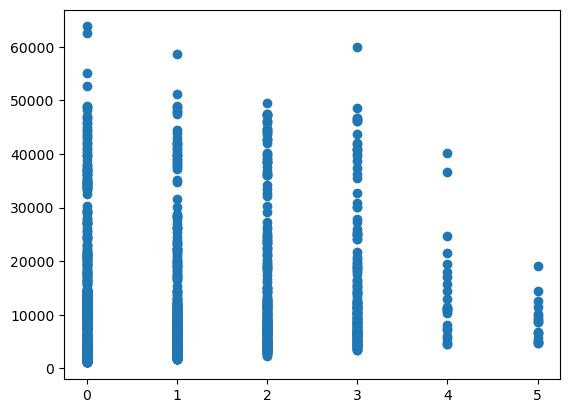

In [17]:
plt.scatter(data['children'], data['charges'])
# A small note we can realize here, samples with 4 or 5 children are paying charges less than the other classes, we need to stop
# targeting them at least.

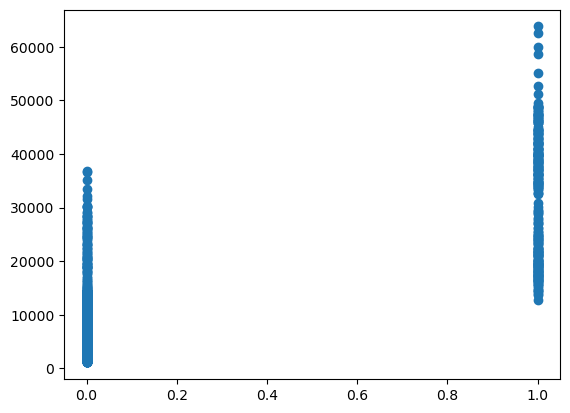

In [18]:
plt.scatter(data['smoker'], data['charges'])
# Fun note we can conclude from here, being smokers makes samples have to pay at least 12500 as charges according to what I see
# from this grapgh, while non-smokers pay at most 40000 as charges, maybe that's because smokers have a greater chance to die, 
# so they need to pay more charges so their relatives cover a greater amount of insurance.

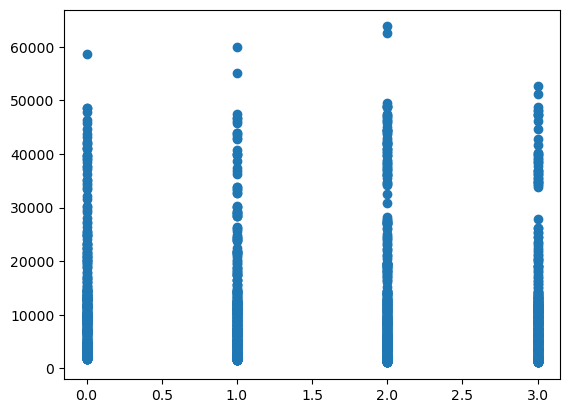

In [19]:
plt.scatter(data['region'], data['charges'])
# No data we can conclude from here.

# My Comments on Data Visualization

In [20]:
# So this is for knowing the main key points we concluded so far:
# 1) in age column, insurance companies love to target 20s people maybe bec. they are still young and don't know what to do with
# their money, then in the 2nd place they target 40s people.
# 2) nothing to be said about sex column.
# 3) in bmi column, insurance companies love to target overweighted people, as they have the chance to die but on the long term,
# we can say that is a great business for them to target the overweighted, obesed & extremely obesed people.
# 4) in children column, we have seen how insurance companies love to target people with no or few children as they are more 
# targeted if dead to return less amount of money.
# 5) a challenging one, in smoker column, I think they are targeting people who die slowly "non smokers", but they do get a lot
# of money from smokers to compensate the fact that they are going to die faster, maybe I need to see which class pays more.
# 6) nothing to be said about region column.

In [21]:
non_smokers_charges = data[data['smoker'] == 0]['charges'].sum()
smokers_charges = data[data['smoker'] == 1]['charges'].sum()
print("Non Smokers Charges equal: ", non_smokers_charges)
print("Smokers charges equal: ", smokers_charges)
if non_smokers_charges > smokers_charges:
    print ("In total, Non Smokers pay more than Smokers.")
else:
    print ("In total, Smokers pay more than Non Smokers.")
# We have seen non smokers pay less than smokers, but the difference is not big and it proves my idea.

Non Smokers Charges equal:  8974061.468919002
Smokers charges equal:  8781763.521839999
In total, Non Smokers pay more than Smokers.


In [24]:
X = data[['age','bmi','children','smoker']]
# As sex & region columns have no direct relation with charges, we didn't need it and the features are the columns directly 
# relationed with target
y = data['charges']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Decision Tree Regressor

In [26]:
param_grid = {
    'max_depth': [None,5,10,15,20],
    'min_samples_split': [2,5,10,15,20],
    'min_samples_leaf': [1,2,4,5,10]
}

In [27]:
dt = DecisionTreeRegressor(random_state = 42)

In [28]:
grid = GridSearchCV(dt, param_grid, cv = 5, scoring = 'neg_mean_squared_error', n_jobs = -1)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 4, 5, 10],
                         'min_samples_split': [2, 5, 10, 15, 20]},
             scoring='neg_mean_squared_error')

In [29]:
new_model = grid.best_estimator_

In [30]:
y_pred = new_model.predict(X_test)

In [31]:
mse_dt = mean_squared_error(y_test, y_pred)
mse_dt

19884468.77953758

In [32]:
print("Mean Squared Error:", mse_dt)
print("Best Parameters:", grid.best_params_)

Mean Squared Error: 19884468.77953758
Best Parameters: {'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 2}


In [33]:
rmse_dt = np.sqrt(mse_dt)
rmse_dt

4459.200464156953

# Random Forest

In [34]:
rf = RandomForestRegressor()

In [35]:
grid1 = GridSearchCV(rf, param_grid, cv = 5, scoring = 'neg_mean_squared_error', n_jobs = -1)
grid1.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 4, 5, 10],
                         'min_samples_split': [2, 5, 10, 15, 20]},
             scoring='neg_mean_squared_error')

In [36]:
new_model2 = grid1.best_estimator_

In [37]:
y_pred_rf = new_model2.predict(X_test)

In [38]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_rf

18976673.59871707

In [39]:
print("Mean Squared Error:", mse_rf)
print("Best Parameters:", grid1.best_params_)

Mean Squared Error: 18976673.59871707
Best Parameters: {'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 2}


In [40]:
rmse_rf = np.sqrt(mse_rf)
rmse_rf

4356.22240005226

# Gradient Boosting Technique

In [41]:
gb = GradientBoostingRegressor()

In [42]:
grid2 = GridSearchCV(gb, param_grid, cv = 5, scoring = 'neg_mean_squared_error', n_jobs = -1)
grid2.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 4, 5, 10],
                         'min_samples_split': [2, 5, 10, 15, 20]},
             scoring='neg_mean_squared_error')

In [43]:
new_model3 = grid2.best_estimator_

In [44]:
y_pred_gb = new_model3.predict(X_test)

In [45]:
mse_gb = mean_squared_error(y_test, y_pred_gb)
mse_gb

19861684.392452843

In [46]:
print("Mean Squared Error:", mse_gb)
print("Best Parameters:", grid2.best_params_)

Mean Squared Error: 19861684.392452843
Best Parameters: {'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 15}


In [47]:
rmse_gb = np.sqrt(mse_gb)
rmse_gb

4456.644970429307